# NHANES - Negative Binomial Models

## Load libraries

In [2]:
library(dplyr)
library(ggplot2)
library(survey)
library(MASS)
library(coefplot)
library(broom)
library(forcats);

## Load data

In [3]:
nhanes <- read.csv("data/nhanes.csv")

## Set up survey design object


In [4]:
design <- svydesign(ids = ~masked.variance.psu, 
                           strata = ~masked.variance.stratum, 
                           weights = ~MEC10YR,
                           nest = TRUE,
                           data = nhanes)

In [5]:
# View the survey design object
print(design)

Stratified 1 - level Cluster Sampling design (with replacement)
With (153) clusters.
svydesign(ids = ~masked.variance.psu, strata = ~masked.variance.stratum, 
    weights = ~MEC10YR, nest = TRUE, data = nhanes)


## Model selection

### Test for overdispersion

In [ ]:
# Fit a Poisson model
model_poisson <- svyglm(dpq_score ~ ferritin, design = design, family = poisson())

# Calculate Pearson residuals
residuals <- residuals(model_poisson, type = "pearson")

# Assess overdispersion by comparing the variance of residuals to 1
overdispersion_index <- var(residuals)
print(overdispersion_index)

#### Not Pregnant

In [ ]:
# Assuming 'design' is your original survey design object
design_subset <- subset(design, pregnancy.status == 0)


model_poisson_subset <- svyglm(dpq_score ~ ferritin, 
                               design = design_subset, 
                               family = poisson())

In [ ]:
# Calculate Pearson residuals for the subsetted model
residuals_subset <- residuals(model_poisson_subset, type = "pearson")

# Assess overdispersion by comparing the variance of residuals to 1
overdispersion_index_subset <- var(residuals_subset)
print(overdispersion_index_subset)


#### Pregnant

In [ ]:
# Assuming 'design' is your original survey design object
design_subset <- subset(design, pregnancy.status == 1)


model_poisson_subset <- svyglm(dpq_score ~ ferritin, 
                               design = design_subset, 
                               family = poisson())


In [ ]:
# Calculate Pearson residuals for the subsetted model
residuals_subset <- residuals(model_poisson_subset, type = "pearson")

# Assess overdispersion by comparing the variance of residuals to 1
overdispersion_index_subset <- var(residuals_subset)
print(overdispersion_index_subset)

#### Postpartum

In [ ]:
# Assuming 'design' is your original survey design object
design_subset <- subset(design, pregnancy.status == 2)


model_poisson_subset <- svyglm(dpq_score ~ ferritin, 
                               design = design_subset, 
                               family = poisson())


In [ ]:
# Calculate Pearson residuals for the subsetted model
residuals_subset <- residuals(model_poisson_subset, type = "pearson")

# Assess overdispersion by comparing the variance of residuals to 1
overdispersion_index_subset <- var(residuals_subset)
print(overdispersion_index_subset)

**The above results (>1) show evidence of overdispersion: overdispersion in count data, which occurs when the variance exceeds the mean, violates the assumptions of the Poisson distribution, so we will need to use either a quasipoisson model or a negative binomial model**

### Test for model selection

#### Ferritin

In [ ]:
# Fit model 1: 
model1 <- svyglm(dpq_score ~ ferritin, 
                 design, family = quasipoisson(),
                 subset = (pregnancy.status == 1))

# Fit model 2: 
model2 <- svyglm(dpq_score ~ ferritin * factor(low_income), 
                 design, family = quasipoisson(),
                 subset = (pregnancy.status == 1))

# Fit model 3: 
model3 <- svyglm(dpq_score ~ ferritin * factor(low_income), 
                 design, family = negative.binomial(1), #theta = 1
                 subset = (pregnancy.status == 1))


In [ ]:
# Calculate BIC manually for each model
n <- sum(weights(design))  # Sample size
k1 <- length(coef(model1))  # Number of parameters in model1
k2 <- length(coef(model2))  # Number of parameters in model2
k3 <- length(coef(model3))  # Number of parameters in model3

bic1 <- -2 * logLik(model1) + log(n) * k1
bic2 <- -2 * logLik(model2) + log(n) * k2
bic3 <- -2 * logLik(model3) + log(n) * k3

# Create a data frame to store the AIC and BIC values
model_comparison <- data.frame(
  Model = c("Model 1", "Model 2", "Model 3"),
  BIC = c(bic1, bic2, bic3)
)

# Print the model comparison table
print(model_comparison)

**Model 3 (negative-binomial) has a lower BIC value compared to Models 1 and 2, suggesting a better model fit when considering both the likelihood of the model and the complexity (number of parameters).** 

#### Transferrin Receptor (tfr)

In [ ]:
# Fit model 1: 
model1 <- svyglm(dpq_score ~ tfr, 
                 design, family = quasipoisson(),
                 subset = (pregnancy.status == 1))

# Fit model 2: 
model2 <- svyglm(dpq_score ~ tfr * factor(low_income), 
                 design, family = quasipoisson(),
                 subset = (pregnancy.status == 1))

# Fit model 3: 
model3 <- svyglm(dpq_score ~ tfr * factor(low_income), 
                 design, family = negative.binomial(1), #theta = 1
                 subset = (pregnancy.status == 1))

In [ ]:
# Calculate BIC manually for each model
n <- sum(weights(design))  # Sample size
k1 <- length(coef(model1))  # Number of parameters in model1
k2 <- length(coef(model2))  # Number of parameters in model2
k3 <- length(coef(model3))  # Number of parameters in model3

bic1 <- -2 * logLik(model1) + log(n) * k1
bic2 <- -2 * logLik(model2) + log(n) * k2
bic3 <- -2 * logLik(model3) + log(n) * k3

# Create a data frame to store the AIC and BIC values
model_comparison <- data.frame(
  Model = c("Model 1", "Model 2", "Model 3"),
  BIC = c(bic1, bic2, bic3)
)

# Print the model comparison table
print(model_comparison)

**Model 3 (negative-binomial), again, is the preferred model**

## Negative binomial regression models

### TfR

#### N for ID_tfr = 1

In [ ]:
# Low N for these categories below, not sure if model above results are useful

##### Not Pregnant

In [ ]:
count_overlap <- nrow(subset(nhanes, pregnancy.status == 0 & low_income == 0 & ID_tfr == 0))

# Print the count
print(count_overlap)

In [ ]:
count_overlap <- nrow(subset(nhanes, pregnancy.status == 0 & low_income == 0 & ID_tfr == 1))

# Print the count
print(count_overlap)

In [ ]:
count_overlap <- nrow(subset(nhanes, pregnancy.status == 0 & low_income == 1 & ID_tfr == 1))

# Print the count
print(count_overlap)

In [ ]:
count_overlap <- nrow(subset(nhanes, pregnancy.status == 0 & low_income == 1 & ID_tfr == 0))

# Print the count
print(count_overlap)

##### Pregnant

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 1 & low_income == 1 & ID_tfr == 1))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 1 & low_income == 1 & ID_tfr == 0))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 1 & low_income == 0 & ID_tfr == 1))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 1 & low_income == 0 & ID_tfr == 0))

# Print the count
print(count_overlap)

##### Postpartum

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 2 & low_income == 1 & ID_tfr == 1))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 2 & low_income == 0 & ID_tfr == 1))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 2 & low_income == 0 & ID_tfr == 0))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 2 & low_income == 1 & ID_tfr == 0))

# Print the count
print(count_overlap)

### Predictor: ID_tfr, Outcome: dpq_score

In [ ]:
# Fit the negative binomial regression model 
model_id_tfr_np1 <- svyglm(dpq_score ~ ID_tfr * factor(low_income), 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 0))
# Print the model summary
summary(model_id_tfr_np1)

In [ ]:
# Get the coefficients
coefficients <- coef(model_id_tfr_np1)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

In [ ]:
irrs

In [ ]:
# Fit the negative binomial regression model 
model_id_tfr_np2 <- svyglm(dpq_score ~ ID_tfr * factor(low_income) + race.ethnicity + age + hscrp, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 0))

# Print the model summary
summary(model_id_tfr_np2)


In [ ]:
# Get the coefficients
coefficients <- coef(model_id_tfr_np2)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Fit the negative binomial regression model 
model_id_tfr_p1 <- svyglm(dpq_score ~ ID_tfr * factor(low_income), 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 1))
# Print the model summary
summary(model_id_tfr_p1)

In [ ]:
# Fit the negative binomial regression model 
model_id_tfr_p2 <- svyglm(dpq_score ~ ID_tfr * factor(low_income)+ race.ethnicity + age + hscrp, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 1))
# Print the model summary
summary(model_id_tfr_p2)

In [ ]:
# Fit the negative binomial regression model 
model_id_tfr_pp1 <- svyglm(dpq_score ~ ID_tfr * factor(low_income), 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 2))
# Print the model summary
summary(model_id_tfr_pp1)

In [ ]:
# Get the coefficients
coefficients <- coef(model_id_tfr_pp1)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Fit the negative binomial regression model 
model_id_tfr_pp2 <- svyglm(dpq_score ~ ID_tfr * factor(low_income)+ race.ethnicity + age + hscrp, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 2))
# Print the model summary
summary(model_id_tfr_pp2)

In [ ]:
# Get the coefficients
coefficients <- coef(model_id_tfr_pp2)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

#### Stratified

In [ ]:
# Fit the model for low_income = 0
model_tfr_low_income_0 <- svyglm(dpq_score ~ ID_tfr,
                                  design,
                                  family = negative.binomial(1),
                                  subset = pregnancy.status == 2 & low_income == 0)

# Fit the model for low_income = 1
model_tfr_low_income_1 <- svyglm(dpq_score ~ ID_tfr,
                                  design,
                                  family = negative.binomial(1),
                                  subset = pregnancy.status == 2 & low_income == 1)

# Print the model summaries
cat("Model for low_income = 0:\n")
summary(model_tfr_low_income_0)

cat("\nModel for low_income = 1:\n")
summary(model_tfr_low_income_1)

In [ ]:
# Fit the model for low_income = 0
model_tfr_low_income_0 <- svyglm(dpq_score ~ ID_tfr + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 0))

# Fit the model for low_income = 1
model_tfr_low_income_1 <- svyglm(dpq_score ~ ID_tfr + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 1))

# Print the model summaries
cat("Model for low_income = 0:\n")
summary(model_tfr_low_income_0)

cat("\nModel for low_income = 1:\n")
summary(model_tfr_low_income_1)

In [ ]:
# Get the coefficients
coefficients <- coef(model_tfr_low_income_0)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Get the coefficients
coefficients <- coef(model_tfr_low_income_1)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

### Predictor: tfr, Outcome: dpq_score


In [ ]:
# Fit the negative binomial regression model 
model_tfr_adjusted_np <- svyglm(dpq_score ~ tfr * factor(low_income), 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 0))
# Print the model summary
summary(model_tfr_adjusted_np)

In [ ]:
# Get the coefficients
coefficients <- coef(model_tfr_adjusted_np)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Fit the negative binomial regression model 
model_tfr_adjusted_np2 <- svyglm(dpq_score ~ tfr * factor(low_income)+ race.ethnicity + age + hscrp, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 0))
# Print the model summary
summary(model_tfr_adjusted_np2)

In [ ]:
# Get the coefficients
coefficients <- coef(model_tfr_adjusted_np2)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Fit the negative binomial regression model 
model_tfr_adjusted_p <- svyglm(dpq_score ~ tfr * factor(low_income), 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 1))
# Print the model summary
summary(model_tfr_adjusted_p)

In [ ]:
# Fit the negative binomial regression model 
model_tfr_adjusted_p2 <- svyglm(dpq_score ~ tfr * factor(low_income)+ race.ethnicity + age + hscrp,  
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 1))
# Print the model summary
summary(model_tfr_adjusted_p2)

In [ ]:
# Fit the negative binomial regression model 
model_tfr_adjusted_pp <- svyglm(dpq_score ~ tfr * factor(low_income), 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 2))
# Print the model summary
summary(model_tfr_adjusted_pp)

In [ ]:
# Get the coefficients
coefficients <- coef(model_tfr_adjusted_pp)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Fit the negative binomial regression model 
model_tfr_adjusted_pp2 <- svyglm(dpq_score ~ tfr * factor(low_income)+ race.ethnicity + age + hscrp, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 2))
# Print the model summary
summary(model_tfr_adjusted_pp2)

In [ ]:
# Get the coefficients
coefficients <- coef(model_tfr_adjusted_pp2)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

#### Stratified

In [ ]:
# Fit the model for low_income = 0
model_tfr_low_income_0 <- svyglm(dpq_score ~ tfr + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 0))

# Fit the model for low_income = 1
model_tfr_low_income_1 <- svyglm(dpq_score ~ tfr + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 1))


In [ ]:
# Print the model summaries
cat("Model for low_income = 0:\n")
summary(model_tfr_low_income_0)

cat("\nModel for low_income = 1:\n")
summary(model_tfr_low_income_1)

In [ ]:
# Get the coefficients
coefficients <- coef(model_tfr_low_income_0)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Get the coefficients
coefficients <- coef(model_tfr_low_income_1)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

### Table

In [ ]:
# Fit the models
## Not pregnant group
model_non_low_income_np <- svyglm(dpq_score ~ tfr,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 0))

model_low_income_np <- svyglm(dpq_score ~ tfr,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 1))


model_non_low_income_adj_np <- svyglm(dpq_score ~ tfr + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 0))

model_low_income_adj_np <- svyglm(dpq_score ~ tfr + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 1))



## Pregnant group
model_non_low_income_p <- svyglm(dpq_score ~ tfr,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 0))

model_low_income_p <- svyglm(dpq_score ~ tfr,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 1))


model_non_low_income_adj_p <- svyglm(dpq_score ~ tfr + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 0))

model_low_income_adj_p <- svyglm(dpq_score ~ tfr + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 1))


## Postpartum group

model_non_low_income_pp <- svyglm(dpq_score ~ tfr,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 0))

model_low_income_pp <- svyglm(dpq_score ~ tfr,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 1))


model_non_low_income_adj_pp <- svyglm(dpq_score ~ tfr + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 0))

model_low_income_adj_pp <- svyglm(dpq_score ~ tfr + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 1))



In [ ]:
# Function to extract model results
extract_model_results <- function(model_summary) {
  result_table <- as.data.frame(model_summary$coefficients)
  colnames(result_table) <- c("Estimate", "Std. Error", "z value", "P-value")
  result_table$IRR <- exp(result_table$Estimate)
  result_table$`95% CI Lower` <- exp(result_table$Estimate - 1.96 * result_table$`Std. Error`)
  result_table$`95% CI Upper` <- exp(result_table$Estimate + 1.96 * result_table$`Std. Error`)
  result_table <- result_table[, c("IRR", "95% CI Lower", "95% CI Upper", "P-value")]
  row.names(result_table) <- make.names(row.names(result_table), unique = TRUE)
  return(result_table)
}

# Print results for all models
cat("Not pregnant, not low-income group:\n")
knitr::kable(extract_model_results(summary(model_non_low_income_np)), digits = 3)

cat("\nNot pregnant, low-income group:\n")
knitr::kable(extract_model_results(summary(model_low_income_np)), digits = 3)

cat("\nNot pregnant, not low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_non_low_income_adj_np)), digits = 3)

cat("\nNot pregnant, low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_low_income_adj_np)), digits = 3)

cat("\nPregnant, not low-income group:\n")
knitr::kable(extract_model_results(summary(model_non_low_income_p)), digits = 3)

cat("\nPregnant, low-income group:\n")
knitr::kable(extract_model_results(summary(model_low_income_p)), digits = 3)

cat("\nPregnant, not low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_non_low_income_adj_p)), digits = 3)

cat("\nPregnant, low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_low_income_adj_p)), digits = 3)

cat("\nPostpartum, all:\n")
knitr::kable(extract_model_results(summary(model_pp)), digits = 3)

cat("\nPostpartum, not low-income group:\n")
knitr::kable(extract_model_results(summary(model_non_low_income_pp)), digits = 3)

cat("\nPostpartum, low-income group:\n")
knitr::kable(extract_model_results(summary(model_low_income_pp)), digits = 3)

cat("\nPostpartum, not low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_non_low_income_adj_pp)), digits = 3)

cat("\nPostpartum, low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_low_income_adj_pp)), digits = 3)

### Ferritin

#### N for iron deficiency based on ferritin levels

##### Not Pregnant

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 0 & low_income == 0 & ID_ferr == 0))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 0 & low_income == 0 & ID_tfr == 1))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 0 & low_income == 1 & ID_tfr == 0))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 0 & low_income == 1 & ID_tfr == 1))

# Print the count
print(count_overlap)

##### Pregnant

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 1 & low_income == 0 & ID_ferr == 0))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 1 & low_income == 1 & ID_ferr == 0))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 1 & low_income == 0 & ID_ferr == 1))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 1 & low_income == 1 & ID_ferr == 1))

# Print the count
print(count_overlap)

##### Postpartum

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 2 & low_income == 0 & ID_ferr == 0))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 2 & low_income == 1 & ID_ferr == 0))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 2 & low_income == 0 & ID_ferr == 1))

# Print the count
print(count_overlap)

In [ ]:
# Overlap count 
count_overlap <- nrow(subset(nhanes, pregnancy.status == 2 & low_income == 1 & ID_ferr == 1))

# Print the count
print(count_overlap)

### Predictor: ID_ferr, Outcome: dpq_score

In [ ]:
# Fit the negative binomial regression model 
model_id_ferr <- svyglm(dpq_score ~ ID_ferr, 
                                design, 
                                family = negative.binomial(1))

# Print the model summary
summary(model_id_ferr)

In [ ]:
# Fit the negative binomial regression model 
model_id_ferr_interaction <- svyglm(depression ~ ID_ferr * factor(low_income), 
                                design, 
                                family = negative.binomial(1))

# Print the model summary
summary(model_id_ferr_interaction)

In [ ]:
# Fit the negative binomial regression model 
model_id_ferr_adjusted_np <- svyglm(dpq_score ~ ID_ferr, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 0))
# Print the model summary
summary(model_id_ferr_adjusted_np)

In [ ]:
# Fit the negative binomial regression model 
model_id_ferr_adjusted_np <- svyglm(dpq_score ~ ID_ferr  * factor(low_income), 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 0))
# Print the model summary
summary(model_id_ferr_adjusted_np)

In [ ]:
# Get the coefficients
coefficients <- coef(model_id_ferr_adjusted_np )

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Fit the negative binomial regression model 
model_id_ferr_adjusted_np2 <- svyglm(dpq_score ~ ID_ferr + low_income + race.ethnicity + age + hscrp, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 0))
# Print the model summary
summary(model_id_ferr_adjusted_np2)

In [ ]:
# Get the coefficients
coefficients <- coef(model_id_ferr_adjusted_np2)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Fit the negative binomial regression model combining pregnancy_status 1 and 2
model_id_ferr_both <- svyglm(dpq_score ~ ID_ferr, 
                                   design, 
                                   family = negative.binomial(1),
                                   subset = (pregnancy.status %in% c(1, 2)))

# Print the model summary
summary(model_id_ferr_both)

In [ ]:
# Fit the negative binomial regression model combining pregnancy_status 1 and 2
model_id_ferr_both <- svyglm(dpq_score ~ ID_ferr, 
                                   design, 
                                   family = negative.binomial(1),
                                   subset = (pregnancy.status %in% c(1, 2)))

# Print the model summary
summary(model_id_ferr_both)

In [ ]:
# Fit the negative binomial regression model 
model_id_ferr_adjusted_p <- svyglm(dpq_score ~ ID_ferr, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 1))
# Print the model summary
summary(model_id_ferr_adjusted_p)

In [ ]:
# Fit the negative binomial regression model 
model_id_ferr_adjusted_p <- svyglm(dpq_score ~ ID_ferr, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 1 & low_income==0))
# Print the model summary
summary(model_id_ferr_adjusted_p)

In [ ]:
# Fit the negative binomial regression model 
model_id_ferr_adjusted_p2 <- svyglm(dpq_score ~ ID_ferr + low_income + race.ethnicity + age + hscrp,
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 1))
# Print the model summary
summary(model_id_ferr_adjusted_p2)

In [ ]:
# Fit the negative binomial regression model 
model_id_ferr_adjusted_pp <- svyglm(dpq_score ~ ID_ferr, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 2))
# Print the model summary
summary(model_id_ferr_adjusted_pp)

In [ ]:
# Fit the negative binomial regression model 
model_id_ferr_adjusted_pp <- svyglm(dpq_score ~ ID_ferr * factor(low_income), 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 2))
# Print the model summary
summary(model_id_ferr_adjusted_pp)

In [ ]:
# Fit the negative binomial regression model 
model_id_ferr_adjusted_pp2 <- svyglm(dpq_score ~ ID_ferr * factor(low_income) + race.ethnicity + age + hscrp,
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 2))
# Print the model summary
summary(model_id_ferr_adjusted_pp2)

In [ ]:
# Get the coefficients
coefficients <- coef(model_id_ferr_adjusted_pp2)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

##### Stratified 

In [ ]:
# Fit the model for low_income = 0
model_tfr_low_income_0 <- svyglm(dpq_score ~ ID_ferr + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),
                                  subset = (pregnancy.status == 0 & low_income == 0))

# Fit the model for low_income = 1
model_tfr_low_income_1 <- svyglm(dpq_score ~ ID_ferr + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 1))


In [ ]:
# Print the model summaries
cat("Model for low_income = 0:\n")
summary(model_tfr_low_income_0)

cat("\nModel for low_income = 1:\n")
summary(model_tfr_low_income_1)

In [ ]:
# Get the coefficients
coefficients <- coef(model_tfr_low_income_0)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Get the coefficients
coefficients <- coef(model_tfr_low_income_1)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

### Predictor: ferritin, Outcome: dpq_score

In [ ]:
# Fit the negative binomial regression model 
model_ferr_adjusted_np <- svyglm(dpq_score ~ ferritin * factor(low_income), 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 0))
# Print the model summary
summary(model_ferr_adjusted_np)

In [ ]:
# Get the coefficients
coefficients <- coef(model_ferr_adjusted_np)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Fit the negative binomial regression model 
model_ferr_adjusted_np2 <- svyglm(dpq_score ~ ferritin * factor(low_income) + race.ethnicity +age +hscrp, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 0))
# Print the model summary
summary(model_ferr_adjusted_np2)

In [ ]:
# Get the coefficients
coefficients <- coef(model_ferr_adjusted_np2)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Fit the negative binomial regression model 
model_ferr_adjusted_p <- svyglm(dpq_score ~ ferritin * factor(low_income), 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 1))
# Print the model summary
summary(model_ferr_adjusted_p)

In [ ]:
# Get the coefficients
coefficients <- coef(model_ferr_adjusted_p)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Fit the negative binomial regression model 
model_ferr_adjusted_p2 <- svyglm(dpq_score ~ ferritin * factor(low_income)+ race.ethnicity +age +hscrp, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 1))
# Print the model summary
summary(model_ferr_adjusted_p2)

In [ ]:
# Get the coefficients
coefficients <- coef(model_ferr_adjusted_p2)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

irrs

In [ ]:
# Fit the negative binomial regression model 
model_ferr_adjusted_pp <- svyglm(dpq_score ~ ferritin * factor(low_income), 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 2))
# Print the model summary
summary(model_ferr_adjusted_pp)

In [ ]:
# Get the coefficients
coefficients <- coef(model_ferr_adjusted_pp)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)
irrs

In [ ]:
# Fit the negative binomial regression model 
model_ferr_adjusted_pp2 <- svyglm(dpq_score ~ ferritin * factor(low_income) + race.ethnicity +age +hscrp, 
                                design,  
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 2))
# Print the model summary
summary(model_ferr_adjusted_pp2)

In [ ]:
# Get the coefficients
coefficients <- coef(model_ferr_adjusted_pp2)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)
irrs

##### Stratified

In [ ]:
# Fit the model for low_income = 0
model_ferr_low_income_0 <- svyglm(dpq_score ~ ferritin + race.ethnicity +age +hscrp, 
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 0))

# Fit the model for low_income = 1
model_ferr_low_income_1 <- svyglm(dpq_score ~ ferritin + race.ethnicity +age +hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 1))


# Print the model summaries
cat("Model for low_income = 0:\n")
summary(model_ferr_low_income_0)

cat("\nModel for low_income = 1:\n")
summary(model_ferr_low_income_1)

In [ ]:
# Get the coefficients
coefficients <- coef(model_ferr_low_income_0)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

In [ ]:
irrs

In [ ]:
# Get the coefficients
coefficients <- coef(model_ferr_low_income_1)

# Calculate the incidence rate ratios (IRRs)
irrs <- exp(coefficients)

In [ ]:
irrs

#### Correct for multiple comparisons

In [ ]:
# Fit the negative binomial regression model
model_ferr_adjusted_pp2 <- svyglm(dpq_score ~ ferritin * factor(low_income) + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),
                                  subset = (pregnancy.status == 2))

# Extract the coefficients and p-values from the model summary
model_summary <- summary(model_ferr_adjusted_pp2)
coefficients <- coef(model_summary)
p_values <- coefficients[, "Pr(>|t|)"]

# Apply the Bonferroni correction for multiple comparison correction
adjusted_p_values <- p.adjust(p_values, method = "bonferroni")

# Create a new data frame with the corrected p-values
adjusted_coefficients <- cbind(coefficients, adjusted_p_values)
colnames(adjusted_coefficients)[ncol(adjusted_coefficients)] <- "Adjusted Pr(>|t|)"

# Print the adjusted coefficients and p-values
adjusted_coefficients

### Table

#### Simple models

##### crude

In [ ]:
model_id_ferr <- svyglm(dpq_score ~ ID_ferr, 
                                design, 
                                family = negative.binomial(1))


model_id_ferr_np <- svyglm(dpq_score ~ ID_ferr, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 0))

model_id_ferr_p <- svyglm(dpq_score ~ ID_ferr, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 1))

model_id_ferr_pp <- svyglm(dpq_score ~ ID_ferr, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 2))


In [ ]:
# Function to extract model results
extract_model_results <- function(model_summary) {
  result_table <- as.data.frame(model_summary$coefficients)
  colnames(result_table) <- c("Estimate", "Std. Error", "z value", "P-value")
  result_table$IRR <- exp(result_table$Estimate)
  result_table$`95% CI Lower` <- exp(result_table$Estimate - 1.96 * result_table$`Std. Error`)
  result_table$`95% CI Upper` <- exp(result_table$Estimate + 1.96 * result_table$`Std. Error`)
  result_table <- result_table[, c("IRR", "95% CI Lower", "95% CI Upper", "P-value")]
  row.names(result_table) <- make.names(row.names(result_table), unique = TRUE)
  return(result_table)
}

# Print results for all models
cat("All:\n")
knitr::kable(extract_model_results(summary(model_id_ferr)), digits = 3)

cat("\nNot pregnant:\n")
knitr::kable(extract_model_results(summary(model_id_ferr_np)), digits = 3)

cat("\npregnant:\n")
knitr::kable(extract_model_results(summary(model_id_ferr_p)), digits = 3)

cat("\npostpartum:\n")
knitr::kable(extract_model_results(summary(model_id_ferr_pp)), digits = 3)


##### Adjusted

In [ ]:
model_id_ferr <- svyglm(dpq_score ~ ID_ferr + bmi + low_income + race.ethnicity + age + hscrp, 
                                design, 
                                family = negative.binomial(1))


model_id_ferr_np <- svyglm(dpq_score ~ ID_ferr + bmi + low_income + race.ethnicity + age + hscrp, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 0))

model_id_ferr_p <- svyglm(dpq_score ~ ID_ferr + bmi + low_income + race.ethnicity + age + hscrp, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 1))

model_id_ferr_pp <- svyglm(dpq_score ~ ID_ferr + bmi + low_income + race.ethnicity + age + hscrp, 
                                design, 
                                family = negative.binomial(1),
                                subset = (pregnancy.status == 2))


In [ ]:
# Function to extract model results
extract_model_results <- function(model_summary) {
  result_table <- as.data.frame(model_summary$coefficients)
  colnames(result_table) <- c("Estimate", "Std. Error", "z value", "P-value")
  result_table$IRR <- exp(result_table$Estimate)
  result_table$`95% CI Lower` <- exp(result_table$Estimate - 1.96 * result_table$`Std. Error`)
  result_table$`95% CI Upper` <- exp(result_table$Estimate + 1.96 * result_table$`Std. Error`)
  result_table <- result_table[, c("IRR", "95% CI Lower", "95% CI Upper", "P-value")]
  row.names(result_table) <- make.names(row.names(result_table), unique = TRUE)
  return(result_table)
}

# Print results for all models
cat("All:\n")
knitr::kable(extract_model_results(summary(model_id_ferr)), digits = 3)

cat("\nNot pregnant:\n")
knitr::kable(extract_model_results(summary(model_id_ferr_np)), digits = 3)

cat("\npregnant:\n")
knitr::kable(extract_model_results(summary(model_id_ferr_p)), digits = 3)

cat("\npostpartum:\n")
knitr::kable(extract_model_results(summary(model_id_ferr_pp)), digits = 3)


#### stratified

In [ ]:
# Fit the models
## all
model_non_low_income_all <- svyglm(dpq_score ~ ID_ferr,
                                  design,
                                  family = negative.binomial(1),
                                  subset = low_income == 0)

model_low_income_all <- svyglm(dpq_score ~ ID_ferr,
                                  design,
                                  family = negative.binomial(1),
                                  subset = low_income == 1)


model_non_low_income_adj_all <- svyglm(dpq_score ~ ID_ferr + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),
                                  subset = low_income == 0)

model_low_income_adj_all <- svyglm(dpq_score ~ ID_ferr + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),
                                  subset = low_income == 1)

## Not pregnant group
model_non_low_income_np <- svyglm(dpq_score ~ ID_ferr,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 0))

model_low_income_np <- svyglm(dpq_score ~ ID_ferr,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 1))


model_non_low_income_adj_np <- svyglm(dpq_score ~ ID_ferr + bmi +race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 0))

model_low_income_adj_np <- svyglm(dpq_score ~ ID_ferr + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 1))



## Pregnant group
model_non_low_income_p <- svyglm(dpq_score ~ ID_ferr,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 0))

model_low_income_p <- svyglm(dpq_score ~ ID_ferr,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 1))


model_non_low_income_adj_p <- svyglm(dpq_score ~ ID_ferr + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 0))

model_low_income_adj_p <- svyglm(dpq_score ~ ID_ferr + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 1))


## Postpartum group

model_non_low_income_pp <- svyglm(dpq_score ~ ID_ferr,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 0))

model_low_income_pp <- svyglm(dpq_score ~ ID_ferr,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 1))


model_non_low_income_adj_pp <- svyglm(dpq_score ~ ID_ferr + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 0))

model_low_income_adj_pp <- svyglm(dpq_score ~ ID_ferr + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 1))


In [ ]:
# Function to extract model results
extract_model_results <- function(model_summary) {
  result_table <- as.data.frame(model_summary$coefficients)
  colnames(result_table) <- c("Estimate", "Std. Error", "z value", "P-value")
  result_table$IRR <- exp(result_table$Estimate)
  result_table$`95% CI Lower` <- exp(result_table$Estimate - 1.96 * result_table$`Std. Error`)
  result_table$`95% CI Upper` <- exp(result_table$Estimate + 1.96 * result_table$`Std. Error`)
  result_table <- result_table[, c("IRR", "95% CI Lower", "95% CI Upper", "P-value")]
  row.names(result_table) <- make.names(row.names(result_table), unique = TRUE)
  return(result_table)
}

# Print results for all models
cat("All women, not low-income group:\n")
knitr::kable(extract_model_results(summary(model_non_low_income_all)), digits = 3)

cat("\nAll women, low-income group:\n")
knitr::kable(extract_model_results(summary(model_low_income_all)), digits = 3)

cat("\nAll women, not low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_non_low_income_adj_all)), digits = 3)

cat("\nAll women, low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_low_income_adj_all)), digits = 3)

cat("Not pregnant, not low-income group:\n")
knitr::kable(extract_model_results(summary(model_non_low_income_np)), digits = 3)

cat("\nNot pregnant, low-income group:\n")
knitr::kable(extract_model_results(summary(model_low_income_np)), digits = 3)

cat("\nNot pregnant, not low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_non_low_income_adj_np)), digits = 3)

cat("\nNot pregnant, low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_low_income_adj_np)), digits = 3)

cat("\nPregnant, not low-income group:\n")
knitr::kable(extract_model_results(summary(model_non_low_income_p)), digits = 3)

cat("\nPregnant, low-income group:\n")
knitr::kable(extract_model_results(summary(model_low_income_p)), digits = 3)

cat("\nPregnant, not low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_non_low_income_adj_p)), digits = 3)

cat("\nPregnant, low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_low_income_adj_p)), digits = 3)

cat("\nPostpartum, not low-income group:\n")
knitr::kable(extract_model_results(summary(model_non_low_income_pp)), digits = 3)

cat("\nPostpartum, low-income group:\n")
knitr::kable(extract_model_results(summary(model_low_income_pp)), digits = 3)

cat("\nPostpartum, not low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_non_low_income_adj_pp)), digits = 3)

cat("\nPostpartum, low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_low_income_adj_pp)), digits = 3)

#### Ferritin stratified

In [6]:
# Fit the models
## all
model_non_low_income_all <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),
                                  subset = low_income == 0)

model_low_income_all <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),
                                  subset = low_income == 1)


model_non_low_income_adj_all <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),
                                  subset = low_income == 0)

model_low_income_adj_all <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),
                                  subset = low_income == 1)

## Not pregnant group
model_non_low_income_np <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 0))

model_low_income_np <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 1))


model_non_low_income_adj_np <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 0))

model_low_income_adj_np <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 1))



## Pregnant group
model_non_low_income_p <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 0))

model_low_income_p <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 1))


model_non_low_income_adj_p <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 0))

model_low_income_adj_p <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 1))


## Postpartum group

model_non_low_income_pp <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 0))

model_low_income_pp <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 1))


model_non_low_income_adj_pp <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 0))

model_low_income_adj_pp <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 1))


In [7]:
# Function to extract model results
extract_model_results <- function(model_summary) {
  result_table <- as.data.frame(model_summary$coefficients)
  colnames(result_table) <- c("Estimate", "Std. Error", "z value", "P-value")
  result_table$IRR <- exp(result_table$Estimate)
  result_table$`95% CI Lower` <- exp(result_table$Estimate - 1.96 * result_table$`Std. Error`)
  result_table$`95% CI Upper` <- exp(result_table$Estimate + 1.96 * result_table$`Std. Error`)
  result_table <- result_table[, c("IRR", "95% CI Lower", "95% CI Upper", "P-value")]
  row.names(result_table) <- make.names(row.names(result_table), unique = TRUE)
  return(result_table)
}

# Print results for all models
cat("All, not low-income group:\n")
knitr::kable(extract_model_results(summary(model_non_low_income_all)), digits = 3)

cat("\nAll, low-income group:\n")
knitr::kable(extract_model_results(summary(model_low_income_all)), digits = 3)

cat("\nAll, not low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_non_low_income_adj_all)), digits = 3)

cat("\nAll, low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_low_income_adj_all)), digits = 3)


cat("Not pregnant, not low-income group:\n")
knitr::kable(extract_model_results(summary(model_non_low_income_np)), digits = 3)

cat("\nNot pregnant, low-income group:\n")
knitr::kable(extract_model_results(summary(model_low_income_np)), digits = 3)

cat("\nNot pregnant, not low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_non_low_income_adj_np)), digits = 3)

cat("\nNot pregnant, low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_low_income_adj_np)), digits = 3)

cat("\nPregnant, not low-income group:\n")
knitr::kable(extract_model_results(summary(model_non_low_income_p)), digits = 3)

cat("\nPregnant, low-income group:\n")
knitr::kable(extract_model_results(summary(model_low_income_p)), digits = 3)

cat("\nPregnant, not low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_non_low_income_adj_p)), digits = 3)

cat("\nPregnant, low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_low_income_adj_p)), digits = 3)

cat("\nPostpartum, not low-income group:\n")
knitr::kable(extract_model_results(summary(model_non_low_income_pp)), digits = 3)

cat("\nPostpartum, low-income group:\n")
knitr::kable(extract_model_results(summary(model_low_income_pp)), digits = 3)

cat("\nPostpartum, not low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_non_low_income_adj_pp)), digits = 3)

cat("\nPostpartum, low-income group (adjusted):\n")
knitr::kable(extract_model_results(summary(model_low_income_adj_pp)), digits = 3)

All, not low-income group:




|             |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:------------|-----:|------------:|------------:|-------:|
|X.Intercept. | 2.749|        2.524|        2.994|   0.000|
|ferritin     | 1.001|        1.000|        1.002|   0.133|


All, low-income group:




|             |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:------------|-----:|------------:|------------:|-------:|
|X.Intercept. | 3.973|        3.697|        4.270|   0.000|
|ferritin     | 1.001|        1.000|        1.002|   0.012|


All, not low-income group (adjusted):




|               |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:--------------|-----:|------------:|------------:|-------:|
|X.Intercept.   | 1.825|        1.275|        2.610|   0.002|
|ferritin       | 1.001|        1.000|        1.002|   0.206|
|bmi            | 1.021|        1.013|        1.029|   0.000|
|race.ethnicity | 0.990|        0.952|        1.029|   0.617|
|age            | 0.996|        0.987|        1.004|   0.331|
|hscrp          | 0.998|        0.989|        1.007|   0.609|


All, low-income group (adjusted):




|               |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:--------------|-----:|------------:|------------:|-------:|
|X.Intercept.   | 1.730|        1.304|        2.296|   0.000|
|ferritin       | 1.000|        1.000|        1.001|   0.304|
|bmi            | 1.012|        1.006|        1.018|   0.000|
|race.ethnicity | 1.044|        1.003|        1.086|   0.036|
|age            | 1.012|        1.005|        1.019|   0.002|
|hscrp          | 1.004|        0.997|        1.011|   0.291|

Not pregnant, not low-income group:




|             |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:------------|-----:|------------:|------------:|-------:|
|X.Intercept. | 2.727|        2.486|        2.992|   0.000|
|ferritin     | 1.001|        1.000|        1.002|   0.082|


Not pregnant, low-income group:




|             |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:------------|-----:|------------:|------------:|-------:|
|X.Intercept. | 4.084|        3.759|        4.436|   0.000|
|ferritin     | 1.001|        1.000|        1.002|   0.041|


Not pregnant, not low-income group (adjusted):




|               |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:--------------|-----:|------------:|------------:|-------:|
|X.Intercept.   | 1.886|        1.272|        2.796|   0.002|
|ferritin       | 1.001|        1.000|        1.002|   0.172|
|bmi            | 1.020|        1.011|        1.028|   0.000|
|race.ethnicity | 0.995|        0.955|        1.037|   0.823|
|age            | 0.995|        0.986|        1.005|   0.333|
|hscrp          | 0.998|        0.987|        1.010|   0.752|


Not pregnant, low-income group (adjusted):




|               |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:--------------|-----:|------------:|------------:|-------:|
|X.Intercept.   | 1.552|        1.122|        2.148|   0.010|
|ferritin       | 1.000|        0.999|        1.001|   0.642|
|bmi            | 1.013|        1.007|        1.020|   0.000|
|race.ethnicity | 1.053|        1.011|        1.098|   0.016|
|age            | 1.014|        1.006|        1.022|   0.001|
|hscrp          | 1.003|        0.996|        1.011|   0.342|


Pregnant, not low-income group:




|             |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:------------|-----:|------------:|------------:|-------:|
|X.Intercept. | 3.157|        2.442|        4.081|   0.000|
|ferritin     | 0.998|        0.994|        1.003|   0.536|


Pregnant, low-income group:




|             |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:------------|-----:|------------:|------------:|-------:|
|X.Intercept. | 4.236|        3.457|        5.191|    0.00|
|ferritin     | 0.997|        0.994|        1.000|    0.03|


Pregnant, not low-income group (adjusted):




|               |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:--------------|-----:|------------:|------------:|-------:|
|X.Intercept.   | 1.686|        0.662|        4.295|   0.281|
|ferritin       | 0.999|        0.995|        1.003|   0.655|
|bmi            | 1.030|        1.007|        1.054|   0.015|
|race.ethnicity | 0.970|        0.845|        1.113|   0.662|
|age            | 0.994|        0.963|        1.026|   0.712|
|hscrp          | 0.995|        0.985|        1.004|   0.289|


Pregnant, low-income group (adjusted):




|               |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:--------------|-----:|------------:|------------:|-------:|
|X.Intercept.   | 2.948|        1.204|        7.220|   0.025|
|ferritin       | 0.996|        0.993|        0.999|   0.015|
|bmi            | 1.010|        0.987|        1.033|   0.414|
|race.ethnicity | 0.953|        0.876|        1.036|   0.266|
|age            | 1.010|        0.981|        1.040|   0.507|
|hscrp          | 0.991|        0.971|        1.012|   0.426|


Postpartum, not low-income group:




|             |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:------------|-----:|------------:|------------:|-------:|
|X.Intercept. | 3.277|        2.356|        4.557|   0.000|
|ferritin     | 0.996|        0.992|        1.000|   0.042|


Postpartum, low-income group:




|             |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:------------|-----:|------------:|------------:|-------:|
|X.Intercept. | 3.182|         2.59|        3.909|   0.000|
|ferritin     | 1.003|         1.00|        1.006|   0.089|


Postpartum, not low-income group (adjusted):




|               |   IRR| 95% CI Lower| 95% CI Upper| P-value|
|:--------------|-----:|------------:|------------:|-------:|
|X.Intercept.   | 1.371|        0.375|        5.017|   0.637|
|ferritin       | 0.997|        0.994|        1.001|   0.190|
|bmi            | 1.042|        1.019|        1.066|   0.001|
|race.ethnicity | 0.921|        0.808|        1.049|   0.225|
|age            | 0.995|        0.960|        1.032|   0.788|
|hscrp          | 0.990|        0.957|        1.024|   0.579|


Postpartum, low-income group (adjusted):




|               |    IRR| 95% CI Lower| 95% CI Upper| P-value|
|:--------------|------:|------------:|------------:|-------:|
|X.Intercept.   | 12.695|        4.707|       34.238|   0.000|
|ferritin       |  1.004|        1.001|        1.006|   0.014|
|bmi            |  0.999|        0.971|        1.028|   0.967|
|race.ethnicity |  0.972|        0.858|        1.099|   0.649|
|age            |  0.948|        0.922|        0.975|   0.001|
|hscrp          |  1.015|        0.977|        1.054|   0.448|

## Plots

### Forest Plots

In [ ]:
# Tidy the model outputs and add a model identifier
tidy_model_ferr <- tidy(model_ferr_adjusted_pp, conf.int = TRUE) %>%
  mutate(model = "Model Ferr")

tidy_model_id_tfr <- tidy(model_id_tfr_adjusted_pp, conf.int = TRUE) %>%
  mutate(model = "Model ID TFR")


In [ ]:
# Combine the results
combined_models <- bind_rows(tidy_model_ferr, tidy_model_id_tfr)


In [ ]:
# Plotting
ggplot(combined_models, aes(y = term, x = estimate, xmin = conf.low, xmax = conf.high, color = model)) +
  geom_point() +
  geom_errorbarh(height = 0.1) +
  facet_wrap(~model, scales = "free", ncol = 1) +
  labs(x = "Coefficient Estimate", y = "Term", title = "Forest Plot of Model Coefficients") +
  theme_minimal() +
  theme(legend.position = "bottom", axis.text.y = element_text(size = 8), strip.background = element_blank(), strip.text.x = element_text(size = 10, face = "bold"))

### Plots of stratified postpartum model results

In [8]:
# Stratified models that I want to plot

## all
model_non_low_income_all <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),
                                  subset = low_income == 0)

model_low_income_all <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),
                                  subset = low_income == 1)


model_non_low_income_adj_all <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),
                                  subset = low_income == 0)

model_low_income_adj_all <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),
                                  subset = low_income == 1)

## Not pregnant group
model_non_low_income_np <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 0))

model_low_income_np <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 1))


model_non_low_income_adj_np <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 0))

model_low_income_adj_np <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 0 & low_income == 1))



## Pregnant group
model_non_low_income_p <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 0))

model_low_income_p <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 1))


model_non_low_income_adj_p <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 0))

model_low_income_adj_p <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 1 & low_income == 1))


## Postpartum group

model_non_low_income_pp <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 0))

model_low_income_pp <- svyglm(dpq_score ~ ferritin,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 1))


model_non_low_income_adj_pp <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 0))

model_low_income_adj_pp <- svyglm(dpq_score ~ ferritin + bmi + race.ethnicity + age + hscrp,
                                  design,
                                  family = negative.binomial(1),,
                                  subset = (pregnancy.status == 2 & low_income == 1))


In [9]:
# Tidy the model outputs for Ferritin
tidy_models <- list(
  model_non_low_income_all = tidy(model_non_low_income_all, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Non-low income", model = "All"),
  
  model_low_income_all = tidy(model_low_income_all, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Low income", model = "All"),
  
  model_non_low_income_adj_all = tidy(model_non_low_income_adj_all, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Non-low income", model = "Adjusted (all)"),
  
  model_low_income_adj_all = tidy(model_low_income_adj_all, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Low income", model = "Adjusted (all)"),
  
  model_non_low_income_np = tidy(model_non_low_income_np, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Non-low income", model = "Not pregnant"),
  
  model_low_income_np = tidy(model_low_income_np, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Low income", model = "Not pregnant"),
  
  model_non_low_income_adj_np = tidy(model_non_low_income_adj_np, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Non-low income", model = "Adjusted (not pregnant)"),
  
  model_low_income_adj_np = tidy(model_low_income_adj_np, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Low income", model = "Adjusted (not pregnant)"),
  
  model_non_low_income_p = tidy(model_non_low_income_p, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Non-low income", model = "Pregnant"),
  
  model_low_income_p = tidy(model_low_income_p, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Low income", model = "Pregnant"),
  
  model_non_low_income_adj_p = tidy(model_non_low_income_adj_p, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Non-low income", model = "Adjusted (pregnant)"),
  
  model_low_income_adj_p = tidy(model_low_income_adj_p, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Low income", model = "Adjusted (pregnant)"),
  
  model_non_low_income_pp = tidy(model_non_low_income_pp, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Non-low income", model = "Postpartum"),
  
  model_low_income_pp = tidy(model_low_income_pp, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Low income", model = "Postpartum"),
  
  model_non_low_income_adj_pp = tidy(model_non_low_income_adj_pp, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Non-low income", model = "Adjusted (postpartum)"),
  
  model_low_income_adj_pp = tidy(model_low_income_adj_pp, conf.int = TRUE) %>%
    filter(term == "ferritin") %>%
    mutate(group = "Low income", model = "Adjusted (postpartum)")
)

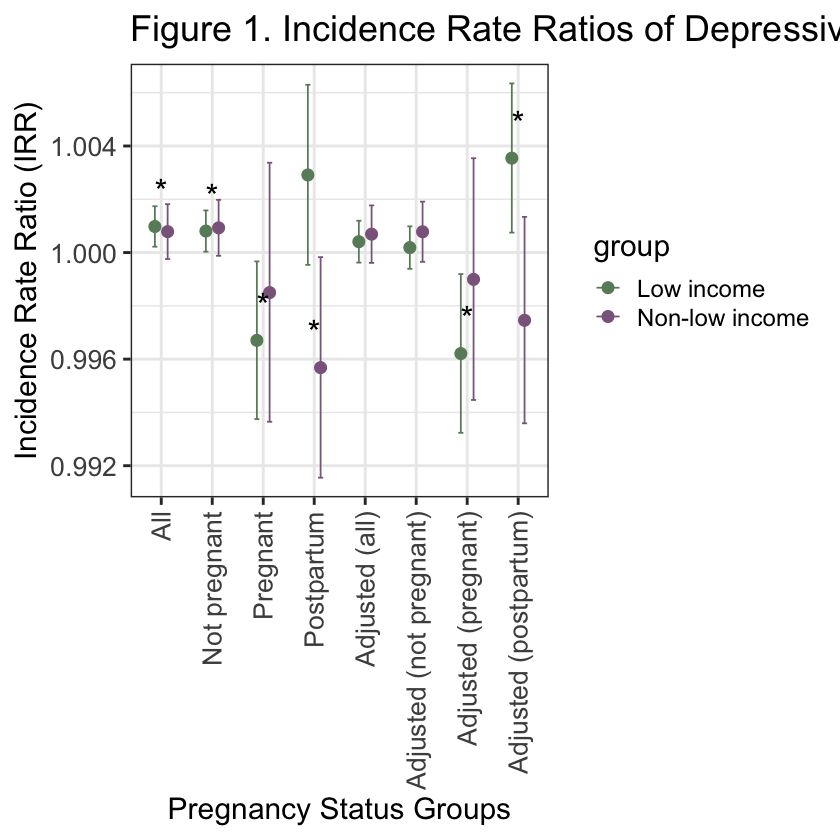

In [22]:
# Combine the tidy data frames
combined_models <- bind_rows(tidy_models)

# Transform the estimates and confidence intervals
combined_models <- combined_models %>%
  mutate(
    estimate = exp(estimate), # Convert log coefficients to IRRs
    conf.low = exp(conf.low), # Convert lower CI bound to IRR
    conf.high = exp(conf.high), # Convert upper CI bound to IRR
    model = fct_relevel(model, "All", 
                        "Not pregnant", 
                        "Pregnant", 
                        "Postpartum",
                        "Adjusted (all)", 
                        "Adjusted (not pregnant)", 
                        "Adjusted (pregnant)", 
                        "Adjusted (postpartum)"),
    significant = p.value < 0.05, # Add a new column indicating significance
    significance_label = ifelse(significant, "*", "") # Mark significant results with an asterisk
  )

# Create the plot with adjusted model positions and individual data points
p <- ggplot(combined_models, aes(x = model, y = estimate, color = group)) +
  geom_point(position = position_dodge(width = 0.5), size = 3) +
  geom_errorbar(aes(ymin = conf.low, ymax = conf.high), width = 0.2,
                position = position_dodge(width = 0.5)) +
  geom_text(aes(label = significance_label), vjust = -1, size = 7, color = "black") +
  scale_color_manual(values = c("darkseagreen4", "plum4")) + # Set custom colors for the groups
  scale_y_continuous(name = "Incidence Rate Ratio (IRR)") +
  theme_bw(base_size = 18) + # Increase base font size for better readability
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 16), # Adjust the angle, justification, and size
        axis.text.y = element_text(size = 16)) + # Increase font size for y axis ticks
  ggtitle("Figure 1. Incidence Rate Ratios of Depressive Symptoms Scores") +
  xlab("Pregnancy Status Groups") 

# Print the plot
print(p)


In [23]:
# Save the plot with increased dimensions
ggsave("figures/figure1.png", p, width = 12, height = 8)

In [ ]:
combined_models

### Plotting interaction in postpartum group

In [ ]:
#tfr

In [ ]:
# Since ID_tfr is binomial, we assume two levels (e.g., 0 and 1)
# Generate a new data frame for prediction
prediction_data <- expand.grid(
  ID_tfr = c(0, 1), # Replace with actual levels if different
  low_income = levels(factor(nhanes$low_income))
)

# Predict dpq_score using the model
# Note: We use type = "link" because we want to work on the scale of the linear predictor for negative binomial
prediction_data$predicted_dpq_score <- predict(model_id_tfr_adjusted_pp, newdata = prediction_data, type = "response")

# Convert factors to character for better plotting
prediction_data$ID_tfr <- as.character(prediction_data$ID_tfr)
prediction_data$low_income <- as.character(prediction_data$low_income)

# Interaction plot
ggplot(prediction_data, aes(x = ID_tfr, y = predicted_dpq_score, fill = low_income)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(
    x = "ID_tfr Level",
    y = "Predicted Depression Score",
    fill = "Low Income Status"
  ) +
  scale_fill_brewer(palette = "Paired") +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 12),
    axis.title.y = element_text(size = 12),
    legend.title = element_text(size = 12)
  )


In [ ]:
# ID_Ferr

In [ ]:
# Since ID_ferr is binomial, we assume two levels (e.g., 0 and 1)
# Generate a new data frame for prediction
prediction_data <- expand.grid(
  ID_ferr = c(0, 1), # Replace with actual levels if different
  low_income = levels(factor(nhanes$low_income))
)

# Predict dpq_score using the model
# Note: We use type = "response" to get predictions on the original count scale
prediction_data$predicted_dpq_score <- predict(model_id_ferr_adjusted_pp, newdata = prediction_data, type = "response")

# Convert factors to character for better plotting
prediction_data$ID_ferr <- as.character(prediction_data$ID_ferr)
prediction_data$low_income <- as.character(prediction_data$low_income)

# Interaction plot
ggplot(prediction_data, aes(x = ID_ferr, y = predicted_dpq_score, fill = low_income)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(
    x = "ID_ferr Level",
    y = "Predicted Depression Score",
    fill = "Low Income Status"
  ) +
  scale_fill_brewer(palette = "Paired") +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 12),
    axis.title.y = element_text(size = 12),
    legend.title = element_text(size = 12)
  )


## Sanity checks

### dpq_score count as a function of pregnancy status

In [ ]:
# Model dpq_score count as a function of pregnancy status
model_dpq_score_pregnancy <- svyglm(dpq_score ~ pregnancy.status, 
                                     design = design, 
                                     family = quasipoisson())

# Print the summary of the model
summary(model_dpq_score_pregnancy)


In [ ]:
# Limit pregnancy status to 0 and 1
limited_design <- subset(design, pregnancy.status %in% c(0, 1))

# Now, model using the limited design
model_dpq_score_pregnancy <- svyglm(dpq_score ~ pregnancy.status, 
                                     design = limited_design, 
                                     family = quasipoisson())

# Summary of the model
summary(model_dpq_score_pregnancy)

pregnancy.status -0.44070: This coefficient represents the expected change in the log count of dpq_score when moving from non-pregnant (0) to pregnant (1). A value of -0.44070 suggests that being pregnant is associated with a decrease in the log count of dpq_score compared to not being pregnant, holding other variables constant. However, the p-value of 0.0559 indicates that this result is marginally significant; it's close to the conventional significance level of 0.05 but slightly above it. This suggests that there is a trend towards lower dpq_score counts among pregnant individuals compared to non-pregnant individuals, but the evidence is not strong enough to conclusively reject the null hypothesis of no difference at the 5% significance level.

### dpq_score count as a function of low income

In [ ]:
# Model dpq_score count as a function of low income
model_dpq_score_check <- svyglm(dpq_score ~ low_income, 
                                     design = design, 
                                     family = quasipoisson())

# Print the summary of the model
summary(model_dpq_score_check)


### dpq_score count as a function of iron deficiency

In [ ]:
model_ferritin_dpq <- svyglm(formula = dpq_score ~ ferritin,
                             design = design,
                             subset = (pregnancy.status == 2),
                             family = gaussian())

summary(model_ferritin_dpq)

In [ ]:
# Create a new data frame with the subset of interest
data_pp <- subset(nhanes, pregnancy.status == 2)

# Create a scatterplot with a fitted linear regression line
ggplot(data_pp, aes(x = ferritin, y = dpq_score)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Ferritin", y = "DPQ Score",
       title = "Relationship between Ferritin and DPQ Score in Postpartum Women") +
  theme_minimal()